In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug=pd.merge(mouse_df,clinical_df, on="Mouse ID")

# Display the data table for preview
drug.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# select only columns : Drug	Timepoint	Tumor Volume (mm3)
drug_time_vol=drug[["Drug","Timepoint","Tumor Volume (mm3)"]]
# group
drug_group=drug_time_vol.groupby(["Drug","Timepoint"])

tumor_vol_mean=drug_group["Tumor Volume (mm3)"].mean()
# print(type(tumor_vol_mean))...it is a series

# Convert to DataFrame
tumor_vol_mean=pd.DataFrame(tumor_vol_mean)
tumor_vol_mean.reset_index(inplace=True)
# Preview DataFrame
tumor_vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se=drug_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_vol_se=pd.DataFrame(tumor_vol_se)
tumor_vol_se.reset_index(inplace=True)
# Preview DataFrame
tumor_vol_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_indextime=tumor_vol_mean.pivot(index="Timepoint",columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_vol_mean_indextime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [20]:
# Generate the Plot (with Error Bars)
# capomulin=tumor_vol_mean_indextime.plot(kind="line", figsize=(5,5))

plt.errorbar(data=tumor_vol_mean_indextime, marker="o",)


# Save the Figure



TypeError: errorbar() missing 2 required positional arguments: 'x' and 'y'

Text(0, 0.5, 'Tumor Volume (mm3)')

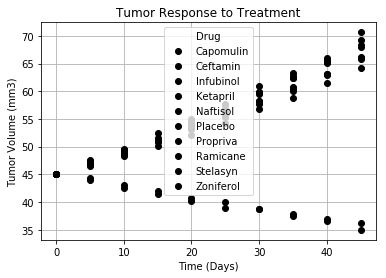

In [21]:
fig, ax = plt.subplots()
tumor_vol_mean_indextime.plot.line(yerr=tumor_vol_se, ax=ax, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3)


plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

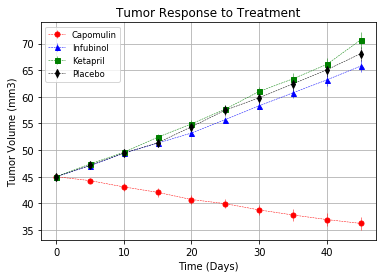

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# select columns
drug_time_meta=drug[["Drug","Timepoint","Metastatic Sites"]]
# groupby
metagroup=drug_time_meta.groupby(["Drug","Timepoint"])
# calculate mean
metagroup_mean=metagroup["Metastatic Sites"].mean()
# Convert to DataFrame
metagroup_mean=pd.DataFrame(metagroup_mean)
metagroup_mean.reset_index(inplace=True)
# Preview DataFrame
metagroup_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metagroup_se=metagroup["Metastatic Sites"].sem()
# Convert to DataFrame
metagroup_se=pd.DataFrame(metagroup_se)
metagroup_se.reset_index(inplace=True)
# Preview DataFrame
metagroup_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [29]:
# Minor Data Munging to Re-Format the Data Frames
metagroup_mean_indextime=metagroup_mean.pivot(index="Timepoint",columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
metagroup_mean_indextime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


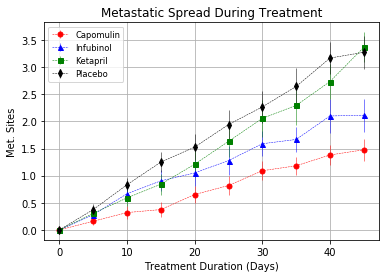

## Survival Rates

In [37]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# select columns
survival=drug[["Drug","Timepoint","Mouse ID"]]
# groupby
survival_group=survival.groupby(["Drug","Timepoint"])
# count
survival_count=survival_group["Mouse ID"].count()

# Convert to DataFrame
survival_count=pd.DataFrame(survival_count)
survival_count=survival_count.rename(columns={"Mouse ID":"Mouse Count"})
survival_count.reset_index(inplace=True)

# Preview DataFrame
survival_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [47]:
# Minor Data Munging to Re-Format the Data Frames
survival_indextime=survival_count.pivot(index="Timepoint",columns="Drug", values="Mouse Count")
# Preview the Data Frame
survival_indextime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [60]:
print(len(survival_indextime.columns))
# divide each column by the number of mouse count at timepoint "0"
for i in range(len(survival_indextime.columns)):
    survival_analysis=survival_indextime.iloc[:i]/survival_indextime.iloc[0,i]

# print(survival_analysis.dtypes)-float64
survival_analysis.head()

10


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.04,1.00,1.04,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,1.00,1.00,1.00,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.92,0.96,0.92,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.68,0.96,0.92,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.68,0.92,0.84,0.68


In [67]:
# survival_analysis.map("${:.2f}".format) 'DataFrame' object has no attribute 'map'
survival_analysis.style.format({
    "Capomulin": '{:,.2%}'.format,
    "Ceftamin" : '{:,.2%}'.format,
    "Infubinol": '{:,.2%}'.format,
    "Ketapril" : '{:,.2%}'.format,
    "Naftisol" : '{:,.2%}'.format,
    "Placebo"  : '{:,.2%}'.format,
    "Propriva" : '{:,.2%}'.format,
    "Ramicane" : '{:,.2%}'.format,
    "Stelasyn" : '{:,.2%}'.format,
    "Zoniferol": '{:,.2%}'.format
})

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,104.00%,100.00%,104.00%,100.00%
5,100.00%,84.00%,100.00%,92.00%,92.00%,96.00%,100.00%,100.00%,100.00%,96.00%
10,100.00%,80.00%,84.00%,88.00%,84.00%,96.00%,92.00%,96.00%,92.00%,88.00%
15,96.00%,76.00%,84.00%,76.00%,84.00%,80.00%,68.00%,96.00%,92.00%,84.00%
20,92.00%,72.00%,80.00%,76.00%,80.00%,76.00%,68.00%,92.00%,84.00%,68.00%
25,88.00%,72.00%,72.00%,76.00%,72.00%,68.00%,56.00%,92.00%,76.00%,64.00%
30,88.00%,64.00%,68.00%,72.00%,60.00%,60.00%,52.00%,92.00%,72.00%,60.00%
35,88.00%,56.00%,48.00%,68.00%,60.00%,56.00%,40.00%,84.00%,64.00%,56.00%
40,84.00%,56.00%,40.00%,60.00%,60.00%,48.00%,36.00%,80.00%,48.00%,56.00%


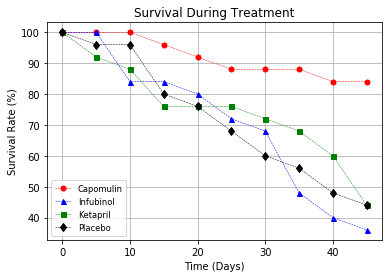

In [12]:
survival_analysis.map("${:.2f}".format)
print(survival_analysis.head())

# Generate the Plot (Accounting for percentages)
survival_analysis.plot()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

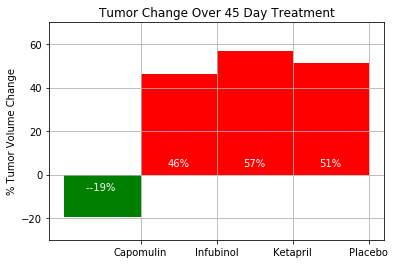